# **ejercicio 2**
Los siguientes datos se refieren a los pesos de algunos mamíferos para su pulso cardiaco en latidos
por minuto. Construir un modelo empírico o ajuste a un solo término (escala de potencias) que relaciona el pulso cardiaco con el peso corporal. Discuta los supuestos del modelo. Use el modelo para determinar el pulso cardiaco de una musaraña etrusca; es el mamífero más pequeño del mundo,  que pesa 2 gramos en su etapa adulta, y compárelo con su valor real, que es **1200** latidos por minuto. Y determine el pulso cardiaco de Ballena azul 180000000 gramos(El corazón de una ballena azul que pesa entre 180 y 200 kg late a un ritmo muy lento, aproximadamente entre **8 y 13** veces por minuto cuando está en reposo. Su latido es tan potente que puede escucharse a más de 3 kilómetros de distancia bajo el agua)  Colibrí abeja pesa  2.5g(El ritmo cardíaco de un colibrí varía entre **250 y 1,200** latidos por minuto (lpm), siendo más rápido en vuelo activo (hasta 1,200 lpm) y más lento en reposo (alrededor de 250 lpm)) y un Zorro rojo 6000g tiene **100** latidos/minuto}


|Mamífero| Peso (g) |Pulso Cardíaco (latidos/min)|
|------- |----------|--------------------------- |
|Vespergo pipistrellas | 4 | 660 |
|Ratón | 25 | 670 |
|Rata | 200 | 420 |
|Conejillo de Indias | 300 | 300 |
|Conejo | 2,000 | 205 |
|Perro pequeño | 5,000 | 120 |
|Perro grande | 30,000 | 85 |
|Oveja | 50,000 | 70 |
|Hombre | 70,000 | 72 |
|Caballo | 450,000 | 38 |
|Buey | 500,000 | 40 |
|Elefante | 3,000,000 | 48 |

In [16]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from Interpolacion_Ajuste.MinimosCuadrados.minimos_cuadrados import minimos_cuadrados
from Interpolacion_Ajuste.ModelosNoLineales.coeficiente_determinacion import coef_determinacion
from Interpolacion_Ajuste.ModelosNoLineales.graficas import graficas_transformaciones


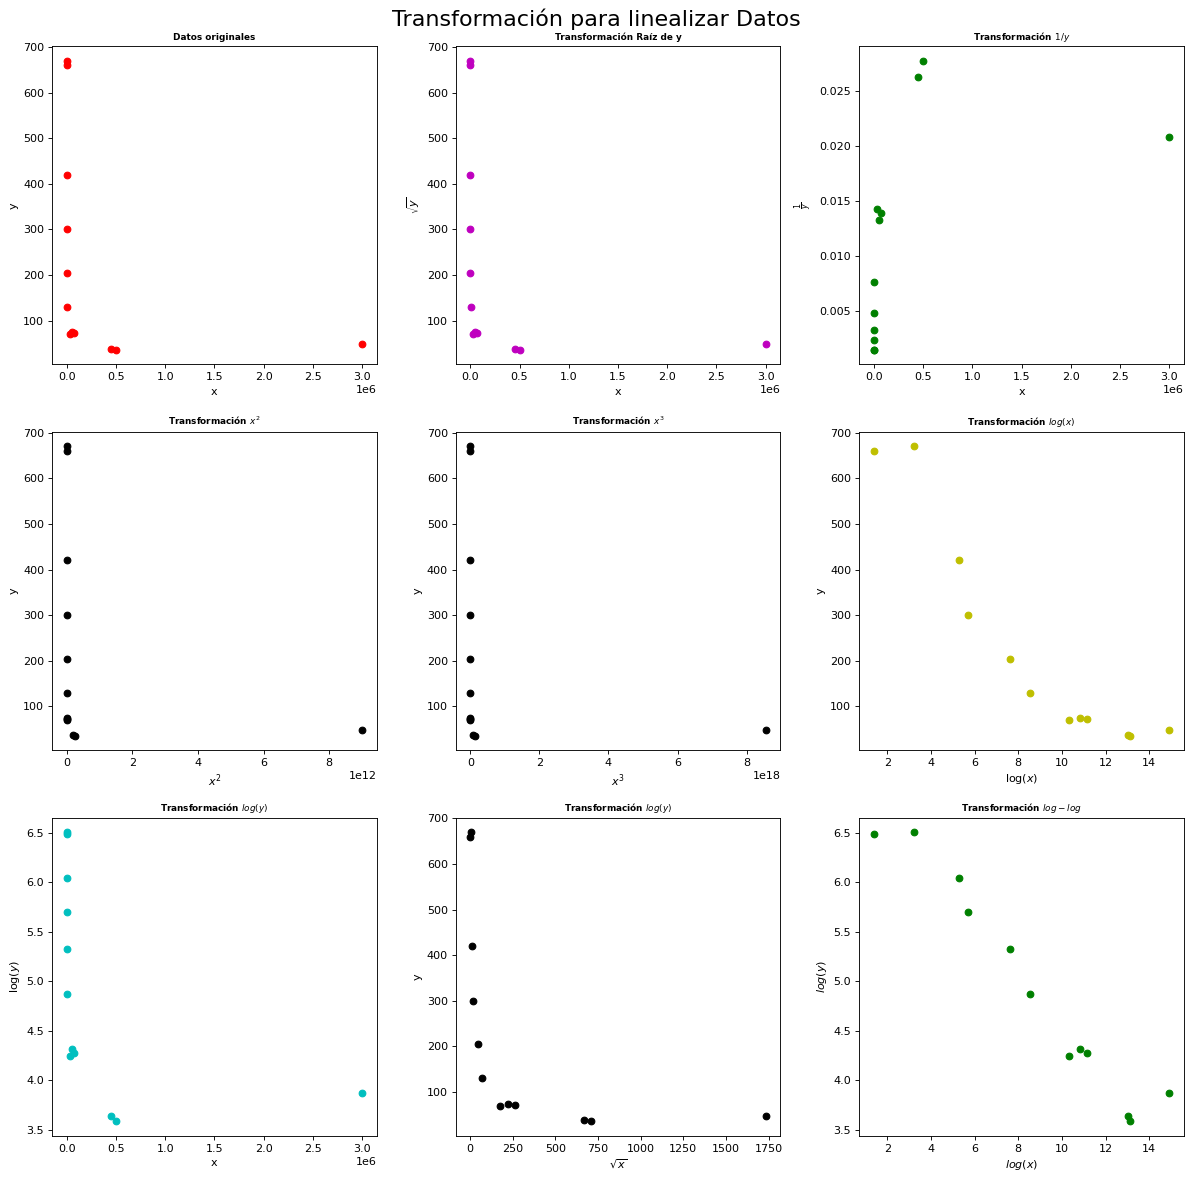

None


In [17]:
# Datos del ejercicio 2 - Peso (g) vs Pulso cardíaco (latidos/min)

x_data = np.array([4, 25, 200, 300, 2000, 5000, 30000, 50000, 70000, 450000, 500000, 3000000])
y_data = np.array([660, 670, 420, 300, 205, 130, 70, 75, 72, 38, 36, 48])

print(graficas_transformaciones(x_data, y_data))

la pendiente es -0.24939045344355223, y el intersepto es 7.089247708712409, y el coeficiente de linealizacion es 0.9498740026104361


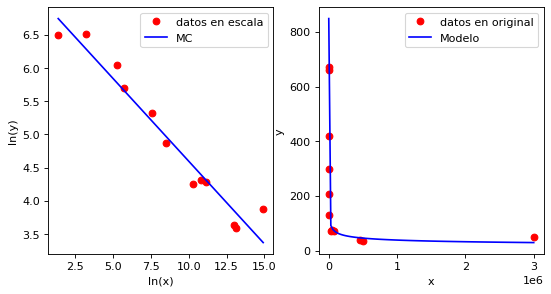

In [18]:
# Modelo1: escala log(x) vs log(y)

m1, b1 = minimos_cuadrados(np.log(x_data), np.log(y_data))
r2_1 = coef_determinacion(m1, b1, np.log(x_data), np.log(y_data))


print(f"la pendiente es {m1}, y el intersepto es {b1}, y el coeficiente de linealizacion es {r2_1}")

line_1 = lambda x: m1 * x + b1
model_1 = lambda x: np.exp(b1) * x**m1

ux_log = np.linspace(np.log(x_data).min(), np.log(x_data).max(), 100)
ux = np.linspace(x_data.min(), x_data.max(), 100)
plt.figure(figsize=(8,4), dpi=80)

# Gráfica en escala log-log
plt.subplot(121)
plt.plot(np.log(x_data), np.log(y_data), 'or', label= "datos en escala")
plt.plot(ux_log, line_1(ux_log), color='b', label="MC")
plt.xlabel("ln(x)")
plt.ylabel("ln(y)")
plt.legend()

# Gráfica en escala original
plt.subplot(122)
plt.plot(x_data, y_data, 'or', label= "datos en original")
plt.plot(ux, model_1(ux), color='b', label="Modelo")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

In [23]:
a = np.exp(b1)

pesos = np.array([2, 180000000, 2.5, 6000], dtype=float)

prediccion = a * pesos ** m1


print(f"Modelo: y = {a} * x^{m1}")
print("Predicciones:", prediccion)

Modelo: y = 1199.0054598806203 * x^-0.24939045344355223
Predicciones: [1008.66546975   10.47212958  954.06666418  136.95765369]


In [28]:
# Valores reales
real = np.array([1200, 10.5, 1200, 100])

# Cálculo del error relativo porcentual
error = abs((prediccion - real) / real * 100)

for i, animal in enumerate(["Musaraña etrusca", "Ballena azul", "Colibrí abeja", "Zorro rojo"]):
    print(f"{animal}: error = {error[i]:.2f}%")

Musaraña etrusca: error = 15.94%
Ballena azul: error = 0.27%
Colibrí abeja: error = 20.49%
Zorro rojo: error = 36.96%


**Interpretación:**

🐭 Musaraña: el modelo subestima un poco su pulso (~16 %), pero sigue en el orden correcto.

🐋 Ballena azul: ajuste excelente, error menor al 1 %, dentro del rango biológico real.

🐦 Colibrí abeja: subestimado en vuelo (~20 %), aunque está dentro del rango normal (250–1200 lpm).

🦊 Zorro rojo: el modelo sobrestima su pulso (~37 %), lo que sugiere que el ajuste podría afinarse si se incluyen más datos en ese rango de masa corporal.